Here, we'll outline how to use `fasttrackpy` functions and classes either in an interactive notebook, or within your own package.

In [1]:
import IPython
from fasttrackpy import process_audio_file, \
    process_directory, \
    process_audio_textgrid,\
    process_corpus
from pathlib import Path

## Function use

The easiest way to start using `fasttrackpy` directly will be by calling one of the `process_*` functions, which will either return a single [`CandidateTracks`](../reference/CandidateTracks.qmd) object, or a list of `CandidateTracks` objects.

### Process an audio file

You can process an audio file, and adjust [the relevant settings](all_arguments.qmd) with `process_audio()`.

In [2]:
audio_path = Path("..", "assets", "audio", "ay.wav")
IPython.display.Audio(audio_path)

In [3]:
candidates = process_audio_file(
    path=audio_path,
    min_max_formant=3000,
    max_max_formant=6000
    )

#### Inspecting the `candidates` object.

There are a few key attributes you can get from the [`candidates`](../reference/CandidateTracks.qmd) object, including

- The error terms for each smooth.
- The winning candidate

In [4]:
candidates.smooth_errors

array([0.22544256, 0.25078883, 0.18968704, 0.14313632, 0.13567622,
       0.11614815, 0.11945207, 0.03664588, 0.03567658, 0.05305987,
       0.06046965, 0.07819208, 0.10361329, 0.07013581, 0.05866597,
       0.0394219 , 0.02852071, 0.05098306, 0.03279   , 0.03167985])

In [5]:
candidates.winner

A formant track object. (4, 385)

#### Inspecting the `candidates.winner` object
The [`candidates.winner`](../reference/OneTrack.qmd) object has a few useful attributes to access as well, including the maximum formant.

In [6]:
candidates.winner.maximum_formant

5526.315789473684

#### Data output - Spectrograms
You can get a spectrogram plot out of either the [`candidates.winner`](../reference/OneTrack.qmd#fasttrackpy.OneTrack.spectrogram) or the [`candidates`](../reference/CandidateTracks.qmd#fasttrackpy.CandidateTracks.spectrograms) itself.

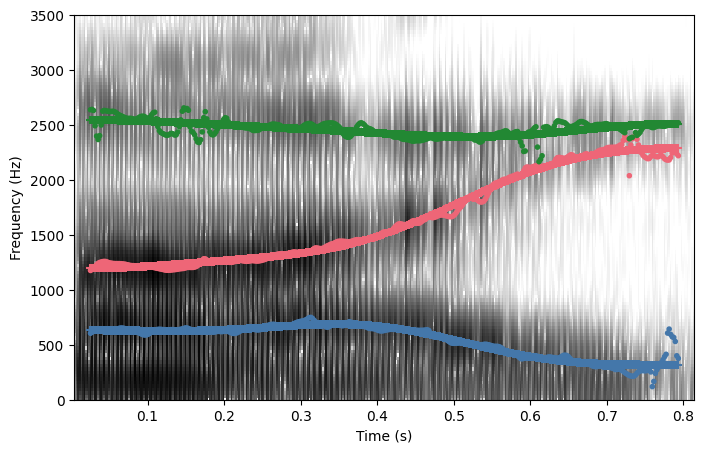

In [7]:
candidates.winner.spectrogram()

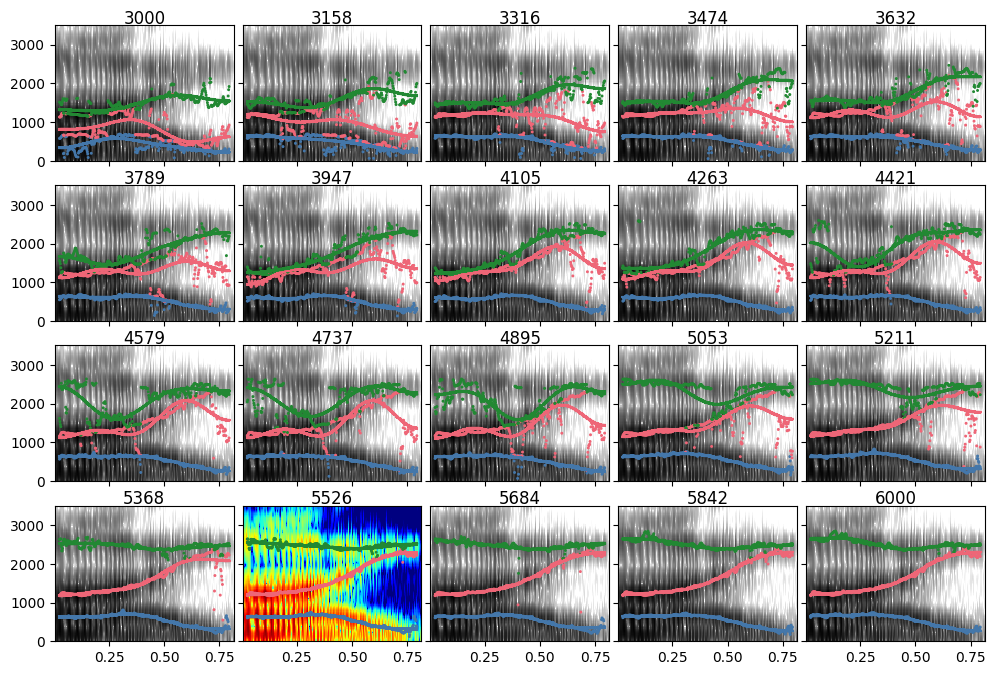

In [8]:
candidates.spectrograms()

#### Data Output - DataFrames

You can output the [`candidates`](../reference/CandidateTracks.qmd#fasttrackpy.CandidateTracks.to_df) to a [polars dataframe](https://pola-rs.github.io/polars/py-polars/html/reference/dataframe/index.html).

In [9]:
candidates.to_df(which = "winner").head()

shape: (5, 18)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ F1        ┆ F2        ┆ F3        ┆ F4        ┆ … ┆ max_forma ┆ n_formant ┆ smooth_me ┆ file_nam │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ nt        ┆ ---       ┆ thod      ┆ e        │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ i32       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 604.37410 ┆ 1175.2673 ┆ 2636.1196 ┆ 2820.4243 ┆ … ┆ 5526.3157 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 8         ┆ 1         ┆ 43        ┆ 13        ┆   ┆ 89        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 613.66304 ┆ 1183.8079 ┆ 2638.7817 ┆ 2764.3368 ┆ … ┆ 5526.3157 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 9         ┆ 81        ┆ 98        ┆ 25        ┆   ┆ 89        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 620.82134 ┆ 1196.4652 ┆ 2629.6176 ┆ 2645.7939 ┆ … ┆ 5526.3157 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 8         ┆ 94        ┆ 97        ┆ 85        ┆   ┆ 89        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 627.36490 ┆ 1212.2206 ┆ 2490.1750 ┆ 2648.9477 ┆ … ┆ 5526.3157 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 8         ┆ 04        ┆ 81        ┆ 44        ┆   ┆ 89        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
│ 633.40092 ┆ 1227.9970 ┆ 2396.7276 ┆ 2646.9073 ┆ … ┆ 5526.3157 ┆ 4         ┆ dct_smoot ┆ ay.wav   │
│ 2         ┆ 19        ┆ 52        ┆ 43        ┆   ┆ 89        ┆           ┆ h_regress ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ion       ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

## Processing an Audio + TextGrid combination.

To process a combination of an audio + textgrid, you can use the [`process_audio_textgrid()`](../reference/process_audio_textgrid.qmd) function. There are a few more options to add here related to textgrid processing.

### TextGrid Processing

#### `entry_classes`

`fasttrackpy` uses [`aligned-textgrid`](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/) to process TextGrids. By default, it will assume your textgrid is formatted as the output of forced alignment with a [Word](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/reference/Word.html) and [Phone](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/reference/Phone.html) tier. If your textgrid doesn't have these tiers, you can pass `entry_classes` [`[SequenceInterval]`](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/reference/SequenceInterval.html) instead.

#### `target_tier`

You need to lest `process_audio_textgrid()` know which tier(s) to process, either by telling it which entry class to target (defaults to `"Phone"`) or by the name of the tier.

#### `target_labels`

To process only specific textgrid intervals (say, the vowels), you can pass `target_labels` a regex string that will match the labels of intervals.

### Running the processing

In [10]:
speaker_audio = Path("..", "assets" , "corpus", "josef-fruehwald_speaker.wav")
speaker_textgrid = Path("..", "assets", "corpus", "josef-fruehwald_speaker.TextGrid")

In [11]:
all_vowels = process_audio_textgrid(
    audio_path=speaker_audio,
    textgrid_path=speaker_textgrid,
    entry_classes=["Word", "Phone"],
    target_tier="Phone",
    # just stressed vowels
    target_labels="[AEIOU].1",
    min_duration=0.05,
    min_max_formant=3000,
    max_max_formant=6000,
    n_formants=4
)

100%|██████████| 174/174 [00:06<00:00, 27.08it/s]


### Inspecting the results 

The `all_vowels` object is a list of [`CandidateTracks`](../reference/CandidateTracks.qmd). Each candidate track object has the same attributes [discussed above](#inspecting-the-candidates-object), but a few additional values added from the textgrid interval.

#### The `SequenceInterval` object

You can access the `aligned-textgrid.SequenceInterval` itself, and [its related attributes](https://forced-alignment-and-vowel-extraction.github.io/alignedTextGrid/usage/02_Sequences/00_sequence_structure.html#the-precedence-and-hierarchy-structure).

In [12]:
all_vowels[0].interval.label

'AY1'

In [13]:
all_vowels[0].interval.fol.label

'K'

In [14]:
all_vowels[0].interval.inword.label

'strikes'

#### Labels & Ids

Interval properties also get added to the `CandidateTracks` object itself, including `.label`, which contains the interval label, and `.id`, which contains a unique id for the interval within the textgrid.

In [15]:
[all_vowels[0].label,
 all_vowels[0].id]

['AY1', '0-0-4-3']

#### Outputting to a dataframe.

In order to output the results to one large dataframe. You'll have to use `polars.concat()`.

In [16]:
import polars as pl
import plotly.express as px


all_df = [vowel.to_df() for vowel in all_vowels]
big_df = pl.concat(all_df, how="diagonal")

In [17]:
#| echo: false
import plotly.io as pio
pio.renderers.default = "notebook"

In [18]:
big_df.shape

(8012, 21)

In [19]:
max_formants = big_df\
    .group_by(["id", "label"])\
    .agg(
        pl.col("max_formant").mean()
    )

In [20]:
fig = px.violin(max_formants, y = "max_formant", points="all")
fig.show()

## Processing a corpus

To process all audio/textgrid pairs in a given directory, you can use [`process_corpus()`](../reference/process_corpus.qmd), which will return a list of all `CandidateTracks` from the corpus.

In [21]:
corpus_path = Path("..", "assets" , "corpus")
all_vowels = process_corpus(corpus_path)

100%|██████████| 273/273 [00:01<00:00, 152.10it/s]


Just like processing an [audio file + textgrid combination](#processing-an-audio-textgrid-combination), you'll need to use `polars.concat()` to get one large data frame as output. The columns `file_name` and `group` will distinguish between measurements from different files and from different speakers within the files.

In [22]:
big_df = pl.concat(
    [cand.to_df() for cand in all_vowels],
    how = "diagonal"
    )

In [23]:
unique_groups = big_df \
    .select("file_name", "group", "id") \
    .unique() \
    .group_by(["file_name", "group"]) \
    .count()

/var/folders/sf/84lgr1c10pggym7_8p8f54r40000gp/T/ipykernel_28952/3440171901.py:5: DeprecationWarning:

`count` is deprecated. It has been renamed to `len`.



## Formant tracking heuristics

There are a few [pre-specified heuristics](`fasttrackpy.processors.heuristic`) for formant tracking implemented in fasttrackpy. You can import them and pass them in a list the `heuristics` argument of any processing function. For example, [](`~fasttrackpy.F1_Max`) specifies that F1 can't be higher than 1200 Hz. Here's an example of using it for formant tracking.

In [24]:
from fasttrackpy import F1_Max

candidates = process_audio_file(
    path=audio_path,
    min_max_formant=3000,
    max_max_formant=6000,
    heuristics=[F1_Max]
)

The heuristic results can be accessed from the `.heuristic_error` attribute of the candidates object. Candidates that pass the heuristic recieve 0, and any that violate the heurostoc recieve `np.inf`.

In [25]:
candidates.heuristic_errors

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Custom Heuristics

The `F1_Max` heuristic is an instance of the [](`~fasttrackpy.MinMaxHeuristic`) class. If you wanted to create your own custom heuristic, you can do so by creating a new instance.

In [26]:
#| results: false
from fasttrackpy import MinMaxHeuristic

## The first formant average must not be higher
## than 500 Hz.
LowF1 = MinMaxHeuristic(
    edge="max",
    measure="frequency",
    number=1,
    boundary=500
)


candidates = process_audio_file(
    path=audio_path,
    min_max_formant=3000,
    max_max_formant=6000,
    heuristics=[LowF1]
)

candidates.heuristic_errors

array([ 0.,  0.,  0.,  0.,  0., inf,  0., inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf])